<a href="https://colab.research.google.com/github/MaryamSyed/linear-regression/blob/master/LinearRegressionfromScratch%26sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression from Scratch

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [0]:
#Creating the cost function

def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))


In [0]:
#gradient descent algorithom
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        #Printing error after every 100 iterations 
        if j%100==0:
            print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
    return [b, m]

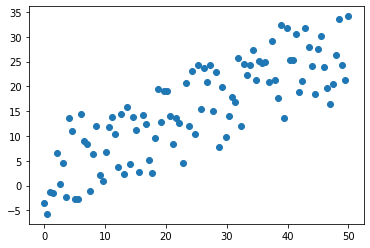

In [0]:
#Creating random data using linspace

x = np.linspace(0, 50, 100) #produces 50 numbers evenly spaced between 0 and 100
delta = np.random.uniform(-10,10,x.size)
y=0.5*x + 3 + delta

plt.scatter(x,y)

In [0]:
#Defining learning rate
learning_rate = 0.0001

initial_b = 0
initial_m = 0

num_iterations= 1000

print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))


Initial MSE: 334.25658312083493
MSE after 0 iterations: 241.26410117857998
MSE after 100 iterations: 31.544801623738874
MSE after 200 iterations: 31.53659994460959
MSE after 300 iterations: 31.52848102629325
MSE after 400 iterations: 31.520444033673915
MSE after 500 iterations: 31.512488140062732
MSE after 600 iterations: 31.50461252711264
MSE after 700 iterations: 31.49681638473428
MSE after 800 iterations: 31.48909891101272
MSE after 900 iterations: 31.48145931212493
b: 0.10687954177458195
m: 0.5979899689374227
MSE: 31.47397204832677


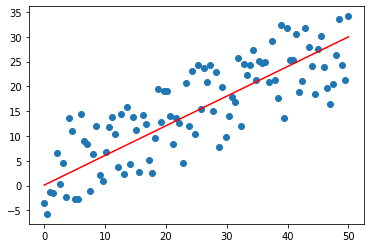

In [0]:
predictions = [(m*x[i]) + b for i in range(len(x))]
plt.scatter(x,y)
plt.plot(x,predictions,color='r')

Linear Regression in sklearn

In [0]:
#Changing the shape of x array from one dimensional to 2 dimensional for sklearn

print(x.shape)
x = x.reshape(-1,1)
print(x.shape)

(100,)
(100, 1)


In [0]:
#Creating model object using LinearRegression
model = LinearRegression()

#fit model to our input data x,y
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Model parameters

print('Y Intercept: ' , model.intercept_) #b
print('Gradient: ', model.coef_) #m

Y Intercept:  1.8167865917456023
Gradient:  [0.54693508]


In [0]:
#Model parameters from linear regression model created from scratch

print('Y Intercept: ' , b) #b
print('Gradient: ', m) #m

Y Intercept:  0.10687954177458195
Gradient:  0.5979899689374227


In [0]:
#Storing predictions in y_pred

y_pred = model.predict(x)

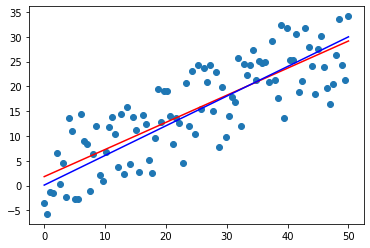

In [0]:
#Plotting predicted line from sklearn linear regression model and model created from scratch
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.plot(x,predictions,color='b')

Linear Regression on Olympic 100m Gold Times

In [0]:
file_name = "https://raw.githubusercontent.com/maryamsyed/linear-regression/master/olympic100m.csv"
df = pd.read_csv(file_name)
df.head()

,year,time
0,1896,12.0
1,1900,11.0
2,1904,11.0
3,1906,11.2
4,1908,10.8


In [0]:
x = df['year']
x_train = np.array(x).reshape(-1,1)
x_train.shape

(29, 1)

In [0]:
y_train=np.array(df['time'])
y_train.shape

(29,)

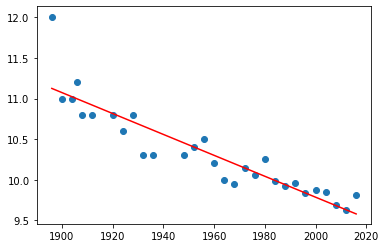

In [0]:
#Create model object

model = LinearRegression()

#Fit model
model.fit(x_train,y_train)

y_pred = model.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x,y_pred,color='r')

In [0]:
#Predicting for 2020

x_2020 = np.array([2020]).reshape(-1,1)

In [0]:
model.predict(x_2020)

array([9.52679525])